# Activité 2
## Modélisation de la trajectoire d'un ballon
Le lancer d'un ballon de basket a été filmé puis pointé à l'aide d'un logiciel de pointage. Le fichier .csv contenant le temps t et les positions x et y du ballon a été déposé sur ce lien : http://www.acamus.net/basket2.csv
Le début du code ci-dessous récupère les données du fichier .csv et crée des listes de données expérimentales t, x et y. 

On souhaite dans un premier temps afficher la trajectoire du ballon et les vecteurs vitesse de ce dernier. Compléter la partie concernant le tracé des vecteurs vitesse dans le code ci-dessous.

Puis le code permet de modéliser la trajectoire du ballon par une parabole. 
Créer à la fin du code quelques lignes permettant d'afficher la vitesse initiale du ballon V0 et l'angle de tir alpha, en supposant que le ballon est en chute libre : 

$$y = {-g x^2 \over 2(V_0cos(\alpha))^2} + tan(\alpha) x.$$


mod  : [-0.29327624  1.5296747  -0.01507183]


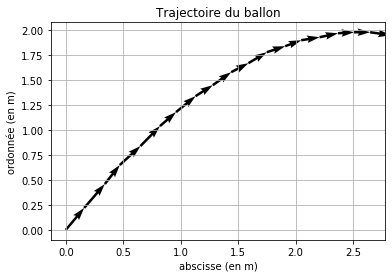

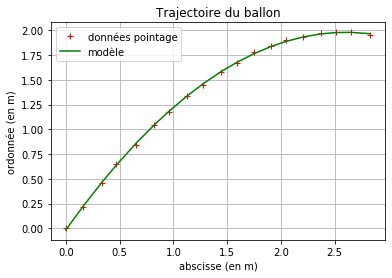

vitesse initiale = 4.3 m/s
 angle de tir = 56.8 °


In [37]:
import csv #importation de la bibliothèque pour manipuler des fichiers de données .csv
import requests #importation de la bibliothèque pour  télécharger des fichiers depuis un serveur
import numpy as np
import matplotlib.pyplot as plt

source = requests.get('http://www.acamus.net/basket2.csv')  #On charge le fichier de données issus d'un pointage depuis un serveur
source=source.content.decode('utf-8') 
source=source.splitlines()
t,x, y = [], [], []
for row in csv.reader(source,delimiter=';'):   #On extrait les données sur le temps et la position (x,y) du ballon que l'on insère 
  t1,x1,y1 = map(float,row)                    #dans des listes t,x et y
  t.append(t1)
  x.append(x1)
  y.append(y1)


n=np.arange(len(t)-1)           #Création des abscisses et ordonnées du vecteur vitesse
vyl=[]                          #Création d'une liste vide pour stocker les ordonnées du vecteur vitesse 
vxl=[]                          #Création d'une liste vide pour stocker les abscisses du vecteur vitesse 
for i in n :
  vx=(x[i+1]-x[i])/(t[i+1]-t[i])                  # Expression de l'abscisse du vecteur vitesse pour l'élément i : à compléter
  vy=(y[i+1]-y[i])/(t[i+1]-t[i])                # Expression de l'ordonnée du vecteur vitesse pour l'élément i  : à compléter
  vxl.append(vx)                  # Ajout de vx dans la liste vxl : à compléter
  vyl.append(vy)                # Ajout de vy dans la liste vyl : à compléter
 

mod=np.polyfit(x,y,2)        #On appelle la fonction np.polyfit pour modéliser la trajectoire du ballon par une parabole. 
print('mod  :',mod)

m=np.arange(len(t))        #On crée la liste ymod qui contient la modélisation de la trajectoire de la parabole. 
ymod=[]
for i in m :  
  y2=mod[0]*x[i]**2+mod[1]*x[i]+mod[2]
  ymod.append(y2)

                   
plt.xlabel('abscisse (en m)')   #Tracé de la trajectoire du ballon et des vecteurs vitesses grâce à la fonction quiver
plt.ylabel('ordonnée (en m)')  
plt.grid()          
plt.title('Trajectoire du ballon') 

for i in n :
  plt.quiver(x[i],y[i],vxl[i], vyl[i],angles='xy', scale=25, scale_units='xy')
plt.show() 

plt.plot(x,y,'r+',label='données pointage')             #Tracé de la trajectoire du ballon et de sa modélisation
plt.plot(x,ymod,'g-',label='modèle') 
plt.xlabel('abscisse (en m)')   
plt.ylabel('ordonnée (en m)')  
plt.grid()          
plt.title('Trajectoire du ballon') 
plt.legend() 
plt.show()

#Calcul de la vitesse initiale V0 du ballon et de l'angle de tir alpha  
g = 9.81
alpha_0 = np.arctan(mod[1])*180/np.pi
v_0 = np.sqrt(-g/(2*mod[0]*np.cos(alpha_0)**2))
print("vitesse initiale =", round(v_0, 1), "m/s" "\n angle de tir =", round(alpha_0, 1), "°")


